In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model


In [86]:
data=pd.read_csv('train.csv')
data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
...,...,...,...,...,...,...,...,...,...,...,...
1163,6,1400,2,440,672,672,1,6,1978,1978,149500
1164,7,1472,2,402,384,802,2,7,1991,1992,160000
1165,5,789,1,250,789,789,1,5,1948,1950,115000
1166,6,1661,1,377,992,1661,1,8,1955,1996,165500


In [71]:
len(data)

1168

In [73]:
data.shape

(1168, 11)

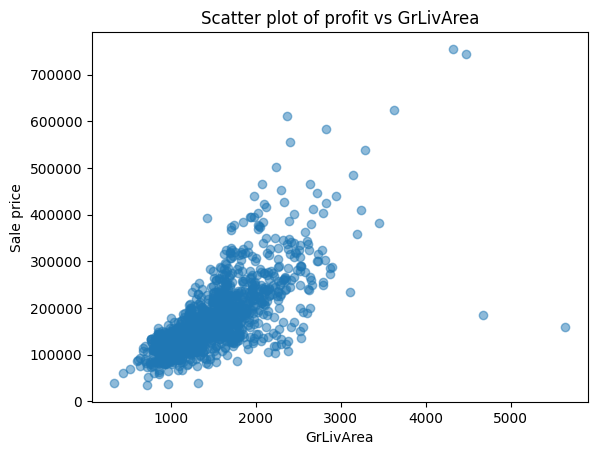

In [74]:
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)
plt.title('Scatter plot of profit vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Sale price')
plt.show()

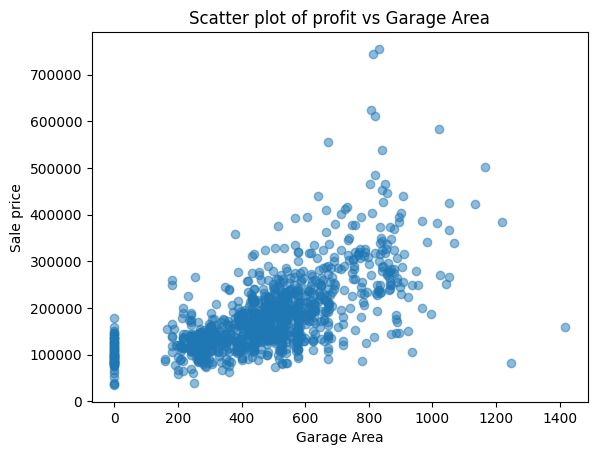

In [75]:
plt.scatter(data['GarageArea'], data['SalePrice'], alpha=0.5)
plt.title('Scatter plot of profit vs Garage Area')
plt.xlabel('Garage Area')
plt.ylabel('Sale price')
plt.show()

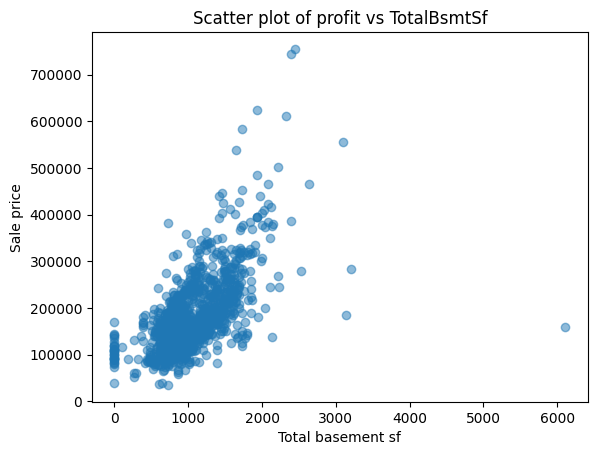

In [76]:
plt.scatter(data['TotalBsmtSF'], data['SalePrice'], alpha=0.5)
plt.title('Scatter plot of profit vs TotalBsmtSf')
plt.xlabel('Total basement sf')
plt.ylabel('Sale price')
plt.show()

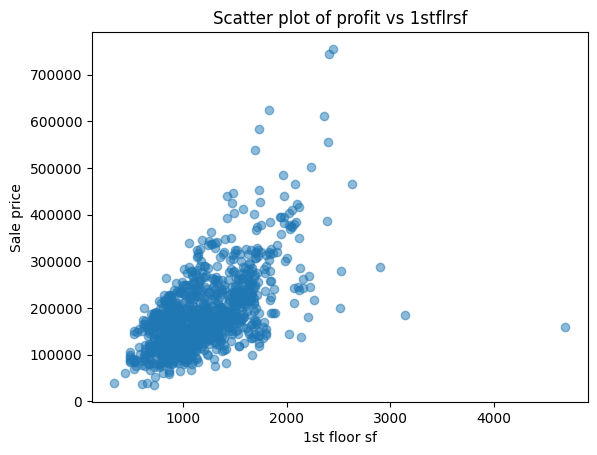

In [77]:
plt.scatter(data['1stFlrSF'], data['SalePrice'], alpha=0.5)
plt.title('Scatter plot of profit vs 1stflrsf')
plt.xlabel('1st floor sf')
plt.ylabel('Sale price')
plt.show()

In [78]:
data['TotArea']= data['GrLivArea'] + data['1stFlrSF'] + data['GarageArea'] + data['TotalBsmtSF']
data.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,TotArea
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000,4219
1,7,1646,1,240,918,918,2,7,1941,1950,164000,3722
2,5,1316,2,484,926,926,1,6,1929,2001,130000,3652
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000,8570
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000,4145


In [79]:
data.corr()['SalePrice']

OverallQual     0.787325
GrLivArea       0.707904
GarageCars      0.643677
GarageArea      0.643247
TotalBsmtSF     0.608507
1stFlrSF        0.603542
FullBath        0.560434
TotRmsAbvGrd    0.530472
YearBuilt       0.525857
YearRemodAdd    0.497762
SalePrice       1.000000
TotArea         0.779922
Name: SalePrice, dtype: float64

In [80]:
Y_axis = 'SalePrice'
Parameters = data.columns.tolist()
Parameters.remove(Y_axis)
Parameters

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'TotArea']

In [81]:
X=data[Parameters].values
Y=data[Y_axis].values

In [82]:
X_train=X
Y_train=Y
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [85]:
X_train

array([[0.66666667, 0.27995479, 0.25      , ..., 0.38686131, 0.        ,
        0.20652553],
       [0.66666667, 0.24717408, 0.25      , ..., 0.50364964, 0.        ,
        0.1776201 ],
       [0.44444444, 0.18500377, 0.5       , ..., 0.41605839, 0.85      ,
        0.17354891],
       ...,
       [0.44444444, 0.08571967, 0.25      , ..., 0.55474453, 0.        ,
        0.1133535 ],
       [0.55555556, 0.25      , 0.25      , ..., 0.60583942, 0.76666667,
        0.23397697],
       [0.66666667, 0.20874152, 0.5       , ..., 0.86131387, 0.66666667,
        0.24078167]])

In [ ]:
reg= linear_model.LinearRegression()
reg.fit(data[[Parameters]],data.Y_axis)
